In [1]:
#  Required Install
!pip install librosa

You should consider upgrading via the '/Users/acmuniz/opt/anaconda3/envs/PythonData/bin/python -m pip install --upgrade pip' command.


In [2]:
#Import Dependencies
from pylab import *
import os
import pandas as pd
import librosa
import librosa.display
import glob
import random

# Sample one audio File

[0. 0. 0. ... 0. 0. 0.] 22050


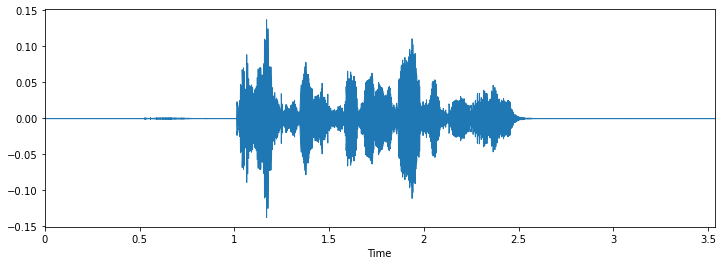

In [3]:
data, sampling_rate = librosa.load('../data/emotion_speech/03-01-08-01-02-02-02.wav')
plt.figure(figsize=(12, 4))

print(data, sampling_rate)
librosa.display.waveplot(data, sr=sampling_rate)

# RAVDASS AUDIO SET


# Generate list of file and apply emotion str

In [4]:
##Get list of Files in folder
file_name = []

for root, dirs, files in os.walk("../data/emotion_speech/."):
    for filename in files:
        file_name.append(filename)

file_name_df = pd.DataFrame(file_name, columns = ['file_name'])
file_name_df['encoding']= file_name_df['file_name']
file_name_df['ID'] = file_name_df.index 
file_name_df['dir']= 'emotion_speech'
file_name_df

,file_name,encoding,ID,dir
0,03-01-06-01-02-02-02.wav,03-01-06-01-02-02-02.wav,0,emotion_speech
1,03-01-05-01-02-01-16.wav,03-01-05-01-02-01-16.wav,1,emotion_speech
2,03-01-08-01-01-01-14.wav,03-01-08-01-01-01-14.wav,2,emotion_speech
3,03-01-06-01-02-02-16.wav,03-01-06-01-02-02-16.wav,3,emotion_speech
4,03-01-05-01-02-01-02.wav,03-01-05-01-02-01-02.wav,4,emotion_speech
...,...,...,...,...
1435,03-01-08-02-02-01-19.wav,03-01-08-02-02-01-19.wav,1435,emotion_speech
1436,03-01-02-02-01-01-23.wav,03-01-02-02-01-01-23.wav,1436,emotion_speech
1437,03-01-02-01-02-01-23.wav,03-01-02-01-02-01-23.wav,1437,emotion_speech
1438,03-01-08-01-01-01-19.wav,03-01-08-01-01-01-19.wav,1438,emotion_speech


In [5]:
#Create DF seperating Values
# Filename identifiers

# Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
# Vocal channel (01 = speech, 02 = song).
# Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
# Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
# Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
# Repetition (01 = 1st repetition, 02 = 2nd repetition).
# Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

encoding_df = file_name_df["encoding"].str.split("-", n=-1, expand=True)
encoding_df.columns = ['Modality','Vocal_channel','Class','Intensity','Statement','Repetition','Actor']
final_df = encoding_df.drop(columns=['Modality','Vocal_channel','Intensity','Statement','Repetition','Actor'])

#final_df.loc[final_df.Class == '01', 'Class'] = '02'
#final_df.loc[final_df.Class == '02', 'Emotion'] = 'calm'
final_df.loc[final_df.Class == '03', 'Emotion'] = 'happy'
final_df.loc[final_df.Class == '04', 'Emotion'] = 'sad'
final_df.loc[final_df.Class == '05', 'Emotion'] = 'angry'
final_df.loc[final_df.Class == '06', 'Emotion'] = 'fearful'
final_df.loc[final_df.Class == '07', 'Emotion'] = 'disgust'
final_df.loc[final_df.Class == '08', 'Emotion'] = 'surprise'

final_df

,Class,Emotion
0,06,fearful
1,05,angry
2,08,surprise
3,06,fearful
4,05,angry
...,...,...
1435,08,surprise
1436,02,NaN
1437,02,NaN
1438,08,surprise


In [6]:
#merge data frame
pre_merged_df = file_name_df.join(final_df, how='outer')
merged_df = pre_merged_df.drop(columns=['encoding'])
merged_df.set_index('ID')

,file_name,dir,Class,Emotion
ID,,,,
0,03-01-06-01-02-02-02.wav,emotion_speech,06,fearful
1,03-01-05-01-02-01-16.wav,emotion_speech,05,angry
2,03-01-08-01-01-01-14.wav,emotion_speech,08,surprise
3,03-01-06-01-02-02-16.wav,emotion_speech,06,fearful
4,03-01-05-01-02-01-02.wav,emotion_speech,05,angry
...,...,...,...,...
1435,03-01-08-02-02-01-19.wav,emotion_speech,08,surprise
1436,03-01-02-02-01-01-23.wav,emotion_speech,02,NaN
1437,03-01-02-01-02-01-23.wav,emotion_speech,02,NaN


In [7]:
ddf = merged_df.dropna()
ddf

,file_name,ID,dir,Class,Emotion
0,03-01-06-01-02-02-02.wav,0,emotion_speech,06,fearful
1,03-01-05-01-02-01-16.wav,1,emotion_speech,05,angry
2,03-01-08-01-01-01-14.wav,2,emotion_speech,08,surprise
3,03-01-06-01-02-02-16.wav,3,emotion_speech,06,fearful
4,03-01-05-01-02-01-02.wav,4,emotion_speech,05,angry
...,...,...,...,...,...
1428,03-01-08-01-02-01-11.wav,1428,emotion_speech,08,surprise
1429,03-01-05-01-01-01-07.wav,1429,emotion_speech,05,angry
1430,03-01-06-01-01-02-13.wav,1430,emotion_speech,06,fearful
1435,03-01-08-02-02-01-19.wav,1435,emotion_speech,08,surprise


In [8]:
ddf.Class.value_counts()

06    192
07    192
04    192
08    192
03    192
05    192
Name: Class, dtype: int64

# TORONTO EMOTIONAL SPEECH DATASET

In [9]:
##Get list of Files in folder
t_file_name = []

for root, dirs, files in os.walk("../data/toronto_speech/."):
    for filename in files:
        t_file_name.append(filename)

t_file_name_df = pd.DataFrame(t_file_name, columns = ['file_name'])
t_file_name_df['encoding']= t_file_name_df['file_name']
t_file_name_df['ID'] = t_file_name_df.index 
t_file_name_df['dir'] = 'toronto_speech'
t_file_name_df.head(20)

,file_name,encoding,ID,dir
0,YAF_wire_happy.wav,YAF_wire_happy.wav,0,toronto_speech
1,OAF_fat_disgust.wav,OAF_fat_disgust.wav,1,toronto_speech
2,OAF_bought_happy.wav,OAF_bought_happy.wav,2,toronto_speech
3,OAF_fit_neutral.wav,OAF_fit_neutral.wav,3,toronto_speech
4,YAF_dead_fear.wav,YAF_dead_fear.wav,4,toronto_speech
5,OAF_join_neutral.wav,OAF_join_neutral.wav,5,toronto_speech
6,YAF_hall_happy.wav,YAF_hall_happy.wav,6,toronto_speech
7,YAF_hurl_neutral.wav,YAF_hurl_neutral.wav,7,toronto_speech
8,OAF_king_angry.wav,OAF_king_angry.wav,8,toronto_speech
9,OAF_rot_angry.wav,OAF_rot_angry.wav,9,toronto_speech


In [10]:
t_encoding_df = t_file_name_df["encoding"].str.split("_", n=-1, expand=True)
t_encoding_df.columns = ['Actor','Word','Emotion']
t_final_df = t_encoding_df.drop(columns=['Actor','Word'])
t_final_df = t_final_df['Emotion'].str.strip('.wav')
toronto_df = pd.DataFrame(t_final_df)
toronto_df

,Emotion
0,happy
1,disgust
2,happy
3,neutral
4,fear
...,...
2795,sad
2796,fear
2797,neutral
2798,happy


In [11]:
#Fix odd values in file and convert Nuetral class to calm
toronto_df.loc[toronto_df.Emotion == 'ps', 'Emotion'] = 'surprise'
#toronto_df.loc[toronto_df.Emotion == 'alm', 'Emotion'] = 'calm'
toronto_df.loc[toronto_df.Emotion == 'ngry', 'Emotion'] = 'angry'
#toronto_df.loc[toronto_df.Emotion == 'neutral', 'Emotion'] = 'calm'
toronto_df.loc[toronto_df.Emotion == 'fear', 'Emotion'] = 'fearful'

#assign emotion value numbers
#toronto_df.loc[toronto_df.Emotion == 'calm', 'Class'] = '02'
toronto_df.loc[toronto_df.Emotion == 'happy', 'Class'] = '03'
toronto_df.loc[toronto_df.Emotion == 'sad', 'Class'] = '04'
toronto_df.loc[toronto_df.Emotion == 'angry', 'Class'] = '05'
toronto_df.loc[toronto_df.Emotion == 'fearful', 'Class'] = '06'
toronto_df.loc[toronto_df.Emotion == 'disgust', 'Class'] = '07'
toronto_df.loc[toronto_df.Emotion == 'surprise', 'Class'] = '08'

toronto_df.head(15)

,Emotion,Class
0,happy,03
1,disgust,07
2,happy,03
3,neutral,NaN
4,fearful,06
5,neutral,NaN
6,happy,03
7,neutral,NaN
8,angry,05
9,angry,05


In [12]:
#merge data frame and export CSV
t_pre_merged_df = t_file_name_df.join(toronto_df, how='outer')
t_merged_df = t_pre_merged_df.drop(columns=['encoding'])
t_merged_df = t_merged_df[['file_name', 'dir', 'Class','Emotion','ID']]
t_merged_df
t_merged_df.set_index('ID')

,file_name,dir,Class,Emotion
ID,,,,
0,YAF_wire_happy.wav,toronto_speech,03,happy
1,OAF_fat_disgust.wav,toronto_speech,07,disgust
2,OAF_bought_happy.wav,toronto_speech,03,happy
3,OAF_fit_neutral.wav,toronto_speech,NaN,neutral
4,YAF_dead_fear.wav,toronto_speech,06,fearful
...,...,...,...,...
2795,OAF_rain_sad.wav,toronto_speech,04,sad
2796,OAF_kill_fear.wav,toronto_speech,06,fearful
2797,OAF_vine_neutral.wav,toronto_speech,NaN,neutral


In [14]:
ddf2 = t_merged_df.dropna()
ddf2

,file_name,dir,Class,Emotion,ID
0,YAF_wire_happy.wav,toronto_speech,03,happy,0
1,OAF_fat_disgust.wav,toronto_speech,07,disgust,1
2,OAF_bought_happy.wav,toronto_speech,03,happy,2
4,YAF_dead_fear.wav,toronto_speech,06,fearful,4
6,YAF_hall_happy.wav,toronto_speech,03,happy,6
...,...,...,...,...,...
2794,OAF_pearl_sad.wav,toronto_speech,04,sad,2794
2795,OAF_rain_sad.wav,toronto_speech,04,sad,2795
2796,OAF_kill_fear.wav,toronto_speech,06,fearful,2796
2798,OAF_hate_happy.wav,toronto_speech,03,happy,2798


In [15]:
ddf2.Class.value_counts()

07    400
04    400
05    400
06    400
08    400
03    400
Name: Class, dtype: int64

# CONCAT DATASETS & RESET INDEX

In [16]:
dataset_df = pd.concat([ddf, ddf2])
dataset2 = dataset_df.reset_index(drop=True)
dataset2['ID']= dataset2.index
final_dataset_df = dataset2
final_dataset_df

,file_name,ID,dir,Class,Emotion
0,03-01-06-01-02-02-02.wav,0,emotion_speech,06,fearful
1,03-01-05-01-02-01-16.wav,1,emotion_speech,05,angry
2,03-01-08-01-01-01-14.wav,2,emotion_speech,08,surprise
3,03-01-06-01-02-02-16.wav,3,emotion_speech,06,fearful
4,03-01-05-01-02-01-02.wav,4,emotion_speech,05,angry
...,...,...,...,...,...
3547,OAF_pearl_sad.wav,3547,toronto_speech,04,sad
3548,OAF_rain_sad.wav,3548,toronto_speech,04,sad
3549,OAF_kill_fear.wav,3549,toronto_speech,06,fearful
3550,OAF_hate_happy.wav,3550,toronto_speech,03,happy


In [17]:
final_dataset_df.Emotion.value_counts()

surprise    592
angry       592
disgust     592
fearful     592
sad         592
happy       592
Name: Emotion, dtype: int64

In [18]:
final_dataset_df.Class.value_counts()

07    592
04    592
05    592
06    592
08    592
03    592
Name: Class, dtype: int64

In [19]:
final_dataset_df.to_csv(r'../data/voice_feature_data.csv', index = True)

In [20]:
train = pd.read_csv('../data/voice_feature_data.csv')
data_dir = ('../data')
train.head()

,Unnamed: 0,file_name,ID,dir,Class,Emotion
0,0,03-01-06-01-02-02-02.wav,0,emotion_speech,6,fearful
1,1,03-01-05-01-02-01-16.wav,1,emotion_speech,5,angry
2,2,03-01-08-01-01-01-14.wav,2,emotion_speech,8,surprise
3,3,03-01-06-01-02-02-16.wav,3,emotion_speech,6,fearful
4,4,03-01-05-01-02-01-02.wav,4,emotion_speech,5,angry


# CREATE FEATURES

In [21]:
train.Class.value_counts()

7    592
5    592
3    592
8    592
6    592
4    592
Name: Class, dtype: int64

In [22]:
def parser(row):
   # function to load files and extract features
   file_name = os.path.join(os.path.abspath(data_dir), str(row.dir), str(row.file_name))

   # handle exception to check if there isn't a file which is corrupted
   try:
      # extraction
      X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
      # extract mfcc data
      mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=128).T,axis=0) 
   except Exception as e:
      print("Error encountered while parsing file: ", file_name)
      return None, None, None
 
   feature = mfccs
   label = row.Class
   emotion = row.Emotion

 
   return [feature, label, emotion]

temp = train.apply(parser, axis=1)

In [23]:
temp.to_csv(r'../data/temp_review.csv', index = True)
temp

0       [[-573.37915, 34.06404, -33.337578, 3.4899158,...
1       [[-545.24457, 38.073475, -8.023163, 7.236882, ...
2       [[-690.53546, 43.141396, -9.854416, 10.81954, ...
3       [[-553.61163, 41.233486, -9.912664, 8.587062, ...
4       [[-576.15344, 49.947994, -13.857949, 8.248825,...
                              ...                        
3547    [[-546.74567, 102.456856, 29.350403, 9.353166,...
3548    [[-540.3414, 88.73076, 24.931204, 16.717299, 1...
3549    [[-422.4946, 53.755165, -2.5026753, 7.4916716,...
3550    [[-463.14896, 82.21517, 6.516157, 3.6688368, -...
3551    [[-462.23047, 87.86248, 6.312949, 0.8862172, 6...
Length: 3552, dtype: object

In [24]:
features = [x[0] for x in temp]
features

labels = [x[1] for x in temp]
labels

emotions = [x[2] for x in temp]
emotions

['fearful',
 'angry',
 'surprise',
 'fearful',
 'angry',
 'fearful',
 'angry',
 'surprise',
 'fearful',
 'angry',
 'angry',
 'surprise',
 'fearful',
 'surprise',
 'surprise',
 'fearful',
 'surprise',
 'angry',
 'happy',
 'happy',
 'sad',
 'disgust',
 'sad',
 'disgust',
 'sad',
 'disgust',
 'sad',
 'disgust',
 'happy',
 'happy',
 'disgust',
 'sad',
 'sad',
 'disgust',
 'disgust',
 'sad',
 'sad',
 'disgust',
 'happy',
 'happy',
 'disgust',
 'sad',
 'disgust',
 'sad',
 'disgust',
 'sad',
 'disgust',
 'sad',
 'happy',
 'happy',
 'angry',
 'fearful',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'fearful',
 'angry',
 'surprise',
 'angry',
 'fearful',
 'angry',
 'fearful',
 'surprise',
 'surprise',
 'angry',
 'fearful',
 'angry',
 'fearful',
 'surprise',
 'fearful',
 'angry',
 'surprise',
 'surprise',
 'fearful',
 'angry',
 'fearful',
 'angry',
 'surprise',
 'surprise',
 'fearful',
 'angry',
 'fearful',
 'surprise',
 'angry',
 'angry',
 'fearful',
 'fearful',
 'angry',
 'angry',
 'sur

In [25]:
features_df = pd.DataFrame(data=features)
features_df

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-573.379150,34.064041,-33.337578,3.489916,-13.482152,-6.327230,-17.734171,-15.280941,-8.379515,-0.323866,...,-0.334692,0.428459,-0.323118,-0.797864,-0.332338,0.177740,0.204333,-0.211895,0.080943,-0.274973
1,-545.244568,38.073475,-8.023163,7.236882,-13.688817,-2.157916,-12.315373,-7.948586,-14.858138,1.719064,...,-0.079512,-0.031505,0.066087,0.029629,-0.052548,-0.059842,-0.084479,0.181888,0.202147,-0.165808
2,-690.535461,43.141396,-9.854416,10.819540,-14.295117,-2.288000,-10.151420,-4.941710,-6.615477,-2.972474,...,-0.045710,0.236663,0.057103,-0.174446,-0.116118,0.133232,0.191797,-0.322106,-0.287355,0.132173
3,-553.611633,41.233486,-9.912664,8.587062,-5.737630,-5.831647,-17.839375,-11.084945,-11.369494,3.470583,...,-0.175183,-0.129597,0.015315,0.068387,0.201094,-0.062219,-0.291406,-0.284542,0.070689,0.088308
4,-576.153442,49.947994,-13.857949,8.248825,-12.159565,0.193612,-8.719680,-7.731155,-8.692744,0.833810,...,-0.403427,0.525122,-0.276208,-0.723615,0.074101,0.027505,0.288559,-0.022368,0.053056,0.346106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3547,-546.745667,102.456856,29.350403,9.353166,5.088076,16.211613,-19.482424,-9.139944,-13.998827,9.648057,...,-0.619448,-0.041929,-0.246950,-0.594068,-0.450932,0.291567,-0.238081,0.314768,-0.006723,-0.299444
3548,-540.341370,88.730759,24.931204,16.717299,12.627457,23.086229,-16.912727,-9.665926,-21.919531,7.123326,...,0.666005,-0.487316,0.291051,-0.689093,-0.379996,-0.879186,-1.241304,-0.860399,-0.541215,0.077663
3549,-422.494598,53.755165,-2.502675,7.491672,-12.121218,5.712925,-20.065599,4.435990,-20.681208,-0.890788,...,-1.294804,-1.216745,-0.763898,-0.213059,-0.679989,-0.656313,0.396446,0.075115,0.258521,-0.535133
3550,-463.148956,82.215172,6.516157,3.668837,-5.777552,4.530596,-24.920565,6.980038,-18.783543,1.689377,...,0.085174,-0.468580,-0.244594,0.097545,-0.555187,0.176684,-0.545609,-0.180844,-0.125507,0.087515


In [26]:
features_df["label"] = labels
features_df["emotions"] = emotions

features_df

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,label,emotions
0,-573.379150,34.064041,-33.337578,3.489916,-13.482152,-6.327230,-17.734171,-15.280941,-8.379515,-0.323866,...,-0.323118,-0.797864,-0.332338,0.177740,0.204333,-0.211895,0.080943,-0.274973,6,fearful
1,-545.244568,38.073475,-8.023163,7.236882,-13.688817,-2.157916,-12.315373,-7.948586,-14.858138,1.719064,...,0.066087,0.029629,-0.052548,-0.059842,-0.084479,0.181888,0.202147,-0.165808,5,angry
2,-690.535461,43.141396,-9.854416,10.819540,-14.295117,-2.288000,-10.151420,-4.941710,-6.615477,-2.972474,...,0.057103,-0.174446,-0.116118,0.133232,0.191797,-0.322106,-0.287355,0.132173,8,surprise
3,-553.611633,41.233486,-9.912664,8.587062,-5.737630,-5.831647,-17.839375,-11.084945,-11.369494,3.470583,...,0.015315,0.068387,0.201094,-0.062219,-0.291406,-0.284542,0.070689,0.088308,6,fearful
4,-576.153442,49.947994,-13.857949,8.248825,-12.159565,0.193612,-8.719680,-7.731155,-8.692744,0.833810,...,-0.276208,-0.723615,0.074101,0.027505,0.288559,-0.022368,0.053056,0.346106,5,angry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3547,-546.745667,102.456856,29.350403,9.353166,5.088076,16.211613,-19.482424,-9.139944,-13.998827,9.648057,...,-0.246950,-0.594068,-0.450932,0.291567,-0.238081,0.314768,-0.006723,-0.299444,4,sad
3548,-540.341370,88.730759,24.931204,16.717299,12.627457,23.086229,-16.912727,-9.665926,-21.919531,7.123326,...,0.291051,-0.689093,-0.379996,-0.879186,-1.241304,-0.860399,-0.541215,0.077663,4,sad
3549,-422.494598,53.755165,-2.502675,7.491672,-12.121218,5.712925,-20.065599,4.435990,-20.681208,-0.890788,...,-0.763898,-0.213059,-0.679989,-0.656313,0.396446,0.075115,0.258521,-0.535133,6,fearful
3550,-463.148956,82.215172,6.516157,3.668837,-5.777552,4.530596,-24.920565,6.980038,-18.783543,1.689377,...,-0.244594,0.097545,-0.555187,0.176684,-0.545609,-0.180844,-0.125507,0.087515,3,happy


In [27]:
#Write to CSV
features_df.to_csv('../data/voice_data.csv', index=False)